# Import necessary libraries

In [392]:
import os
import pandas as pd

## Merging all months of data into a single file

In [393]:
# read all files in data folder and convert them to df
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = os.listdir("./Sales_Data")
files

df_list = []
for file in files:
        df = pd.read_csv(f'./Sales_Data/{file}')
        df_list.append(df)

# join dfs and save to csv
df_total = pd.concat(df_list)
df_total.to_csv('./Sales_Data/Sales_all.csv', index = False)

### Read csv

In [394]:
all_data = pd.read_csv('./Sales_Data/Sales_all.csv')

count_rows_start = len(all_data)

### Clean data

In [395]:
# Remove NaN rows
all_data = all_data.dropna(how = 'all')
all_data.reset_index()

# status
print(f'Removed {count_rows_start - len(all_data)} rows. Now {len(all_data)} in total')
count_rows_start = len(all_data)


# Remove 'Or' rows. Assign all_data to all_data given != condition
temp_df = all_data[all_data['Order Date'].str[:2] == 'Or']

all_data = all_data[all_data['Order Date'].str[:2] != 'Or']

# status
print(f'Removed {count_rows_start - len(all_data)} rows. Now {len(all_data)} in total')
count_rows_start = len(all_data)

all_data.head()

Removed 1090 rows. Now 372610 in total
Removed 710 rows. Now 371900 in total


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Q1: What was the best month for sales? How much was earned that month?

In [396]:
# separate the "Order Date" into month

all_data['Month'] = all_data["Order Date"].str[:2]
all_data['Month'] = all_data['Month'].astype('int32')

# Add revenues (q*p) column. First convert 'Quantity Ordered' and 'Price Each' to int and float

all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')

all_data['Revenue'] = all_data ['Quantity Ordered'] * all_data ['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [397]:
# filter results
results_q1 = all_data.groupby('Month').sum()

best_month_data = results_q1.loc[results['Revenue'].idxmax()]

best_month_revenue = best_month_data['Revenue']
best_month_number = best_month_data.name

print(f'Highest revenues were {best_month_revenue} in month {best_month_number}')

Highest revenues were 9226886.68 in month 12


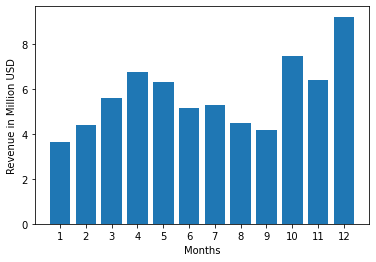

In [398]:
# plot bar chart
import matplotlib.pyplot as plt

# x axis
months = all_data['Month'].sort_values().unique()
months = months.tolist()

plt.bar(months, results_q1['Revenue']/1_000_000)

plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Revenue in Million USD')
plt.show()

### Q2: What US city had the highest number of sales?

In [399]:
# create city column
def get_city(x):
    return x.split(',')[1]
def get_state(x):
    return x.split(',')[2][1:3]

all_data['City'] = all_data['Purchase Address'].apply(get_city)
all_data['State'] = all_data['Purchase Address'].apply(get_state)
all_data['City'] = all_data['City'] + " (" + all_data['State'] + ")"
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA


In [400]:
# get results
results_q2 = all_data.groupby('City').sum()

best_city_data = results_q2.loc[results_q2['Revenue'].idxmax()]

best_city_revenue = best_city_data['Revenue']
best_city = best_city_data.name

print(f'Highest revenues were {best_city_revenue} in city: {best_city}')


Highest revenues were 16524407.82 in city:  San Francisco (CA)


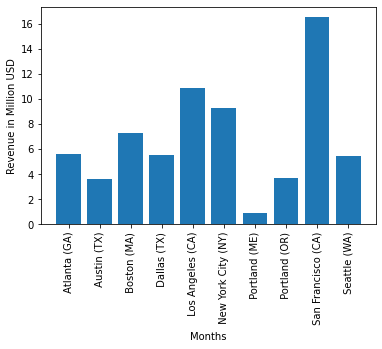

In [401]:
# plot bar chart

# x axis
months = all_data['City'].sort_values().unique()
months = months.tolist()

plt.bar(months, results_q2['Revenue']/1_000_000)

plt.xticks(months, rotation = 'vertical', size = 10)
plt.xlabel('Months')
plt.ylabel('Revenue in Million USD')
plt.show()

### Q3: What time should we display advertisements to max likelihood of customer's buying product?

In [402]:
# extract hour and minute column
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [403]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,9,27


In [404]:
# get results
results_q3 = all_data.groupby('Hour').sum()

best_hour_data = results_q3.loc[results_q3['Revenue'].idxmax()]

best_hour_revenue = best_hour_data['Revenue']
best_hour = best_hour_data.name

print(f'Highest revenues were {best_hour_revenue/1_000_000} M$ in hour: {best_hour}')

Highest revenues were 4.82587708 M$ in hour: 19


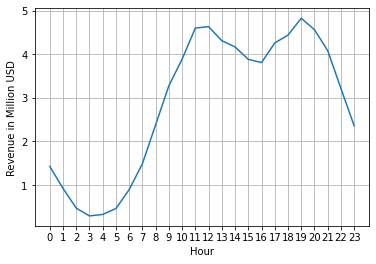

In [405]:
# plot
hours = all_data['Hour'].sort_values().unique()

plt.plot(hours, results_q3['Revenue']/1_000_000)

plt.xticks(hours, rotation = 'horizontal', size = 10)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Revenue in Million USD')
plt.show()

### Q4: What products are most often sold together

In [465]:
# get duplicated 'Order ID'
# df_dup = all_data[all_data.duplicated(subset = 'Order ID', keep = False)]
df_dup = all_data[all_data['Order ID'].duplicated(keep=False)]
# df_dup
# all_data['Product aggregated'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# all_data['Product aggregated'].unique

output_series = df_dup.groupby(['Order ID'])['Product'].apply(list)
output_series

# Can't manage to merge products from the same ID into a list. I know how to do it but it's very neanderthal. Next question

Order ID
141234                                     [iPhone, iPhone]
141235    [Lightning Charging Cable, Lightning Charging ...
141236                 [Wired Headphones, Wired Headphones]
141237                 [27in FHD Monitor, 27in FHD Monitor]
141238                 [Wired Headphones, Wired Headphones]
                                ...                        
319666    [Lightning Charging Cable, Lightning Charging ...
319667       [AA Batteries (4-pack), AA Batteries (4-pack)]
319668                   [Vareebadd Phone, Vareebadd Phone]
319669                 [Wired Headphones, Wired Headphones]
319670    [Bose SoundSport Headphones, Bose SoundSport H...
Name: Product, Length: 178437, dtype: object

### Q5: What product sold the most? Why do you think it sold the most?

In [485]:
# Sold the most in terms of revenue

result_q5 = all_data.groupby(['Product']).sum()
result_q5['Revenue'].sort_values(ascending=False)

Product
Macbook Pro Laptop            16075200.00
iPhone                         9588600.00
ThinkPad Laptop                8259917.40
Google Phone                   6638400.00
27in 4K Gaming Monitor         4870195.12
34in Ultrawide Monitor         4711116.02
Apple Airpods Headphones       4698300.00
Flatscreen TV                  2891400.00
Bose SoundSport Headphones     2691130.86
27in FHD Monitor               2264849.00
Vareebadd Phone                1654400.00
20in Monitor                    908297.42
LG Washing Machine              799200.00
LG Dryer                        775200.00
Lightning Charging Cable        694188.30
USB-C Charging Cable            573002.50
Wired Headphones                492956.86
AA Batteries (4-pack)           212236.80
AAA Batteries (4-pack)          185481.66
Name: Revenue, dtype: float64

In [484]:
# Sold the most in terms of quantity
result_q5 = all_data.groupby(['Product']).sum()
result_q5['Quantity Ordered'].sort_values(ascending=False)

Product
AAA Batteries (4-pack)        62034
AA Batteries (4-pack)         55270
USB-C Charging Cable          47950
Lightning Charging Cable      46434
Wired Headphones              41114
Apple Airpods Headphones      31322
Bose SoundSport Headphones    26914
27in FHD Monitor              15100
iPhone                        13698
27in 4K Gaming Monitor        12488
34in Ultrawide Monitor        12398
Google Phone                  11064
Flatscreen TV                  9638
Macbook Pro Laptop             9456
ThinkPad Laptop                8260
20in Monitor                   8258
Vareebadd Phone                4136
LG Washing Machine             1332
LG Dryer                       1292
Name: Quantity Ordered, dtype: int32